In [1]:
# Importing libraries:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset:

data = pd.read_csv("C:/Users/kaneesha.dawood/Downloads/dummy_data_volunteers.csv")

data.head(10)

,Unnamed: 0,Location,Status,Posting ID,Posting: Status,Posting: Program,Posting: Department,Submitted Date,Application: Created Date,APPID
0,0,OK,Declined,50,Closed,Narcotics Anonymous,Health Services,51:29.4,51:29.4,VOL-313
1,1,ID,Under Review,212,Active,Managing Your Diabetes,Recreation,51:29.4,51:29.4,VOL-4368
2,2,NE,Declined,156,Closed,Soldier On,Unit Management (UM),51:29.4,51:29.4,VOL-753
3,3,HI,Withdrawn,234,Active,Start Now,Unit Management (UM),51:29.4,51:29.4,VOL-7450
4,4,GA,Under Review,165,Active,Vocational Training,Financial Management,51:29.4,51:29.4,VOL-7574
5,5,KS,Withdrawn,85,Active,Life Connections Program,Food Services,51:29.4,51:29.4,VOL-4496
6,6,MO,Submitted,29,Active,Soldier On,Education,51:29.4,51:29.4,VOL-6332
7,7,MD,Under Review,258,Closed,K2 Awareness Program,FDC/Jail - Administration,51:29.4,51:29.4,VOL-4270
8,8,KS,Accepted,268,Active,Life Connections Program,Financial Management,51:29.4,51:29.4,VOL-9648
9,9,CO,Withdrawn,191,Closed,Threshold Program,FDC/Jail - Administration,51:29.4,51:29.4,VOL-4603


In [3]:
df = data.drop('Unnamed: 0', axis=1)
df.head()

,Location,Status,Posting ID,Posting: Status,Posting: Program,Posting: Department,Submitted Date,Application: Created Date,APPID
0,OK,Declined,50,Closed,Narcotics Anonymous,Health Services,51:29.4,51:29.4,VOL-313
1,ID,Under Review,212,Active,Managing Your Diabetes,Recreation,51:29.4,51:29.4,VOL-4368
2,NE,Declined,156,Closed,Soldier On,Unit Management (UM),51:29.4,51:29.4,VOL-753
3,HI,Withdrawn,234,Active,Start Now,Unit Management (UM),51:29.4,51:29.4,VOL-7450
4,GA,Under Review,165,Active,Vocational Training,Financial Management,51:29.4,51:29.4,VOL-7574


In [4]:
#exploring contents of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Location                   200 non-null    object
 1   Status                     200 non-null    object
 2   Posting ID                 200 non-null    int64 
 3   Posting: Status            200 non-null    object
 4   Posting: Program           200 non-null    object
 5   Posting: Department        200 non-null    object
 6   Submitted Date             200 non-null    object
 7   Application: Created Date  200 non-null    object
 8   APPID                      200 non-null    object
dtypes: int64(1), object(8)
memory usage: 14.2+ KB


# Exploratory Questions:

* How does the distribution of application statuses (Accepted, Under Review, Declined, Withdrawn) vary across different program categories, and are there any patterns or correlations between program types and application outcomes?
* Which programs have the highest number of applications? Does this suggest a higher demand or popularity among volunteers?
* How do the preferences for volunteer programs vary across different states, and what factors contribute to the popularity of specific programs in particular geographical regions?
* How does the status of a program (Active vs. Closed) affect the number of applications and their acceptance rate?
* How can we optimize program selection and design to increase acceptance rates and engagement among incarcerated individuals, considering factors such as program type, status (Active vs. Closed), and departmental focus?

### I. Distribution of Application Status

What is the distribution of application statuses across all volunteer applications?

In [109]:
# how many occurrences are in the status column
status_count = df['Status'].value_counts()
status_count

Accepted        44
Withdrawn       42
Declined        39
Submitted       38
Under Review    37
Name: Status, dtype: int64

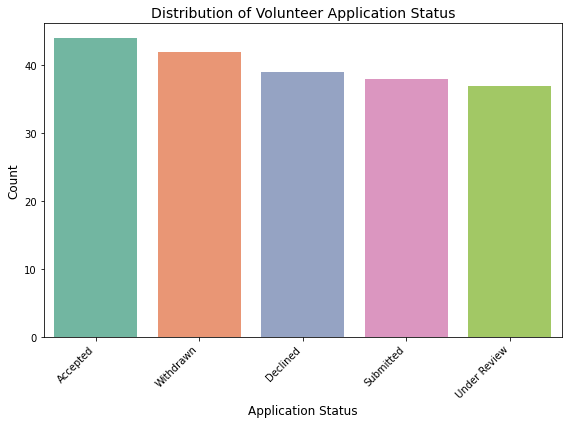

In [110]:
# Visualizing the Application Status:
status_count = df['Status'].value_counts()

# Create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=status_count.index, y=status_count.values, palette="Set2", ax=ax)

# Add labels and title
ax.set_xlabel('Application Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Volunteer Application Status', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [112]:
program_status_counts = df.groupby(['Posting: Program', 'Status'])['APPID'].count().reset_index()
program_status_counts

,Posting: Program,Status,APPID
0,AARP Foundation Finances 50+,Submitted,2
1,AARP Foundation Finances 50+,Withdrawn,4
2,Alcoholics Anonymous (AA) Support Group,Accepted,4
3,Alcoholics Anonymous (AA) Support Group,Declined,1
4,Alcoholics Anonymous (AA) Support Group,Submitted,1
...,...,...,...
94,Start Now,Submitted,4
95,Start Now,Withdrawn,1
96,Threshold Program,Withdrawn,4
97,Vocational Training,Under Review,2


In [113]:
program_status_matrix = program_status_counts.pivot(index='Posting: Program', columns='Status', values='APPID')
program_status_matrix = program_status_matrix.fillna(0)

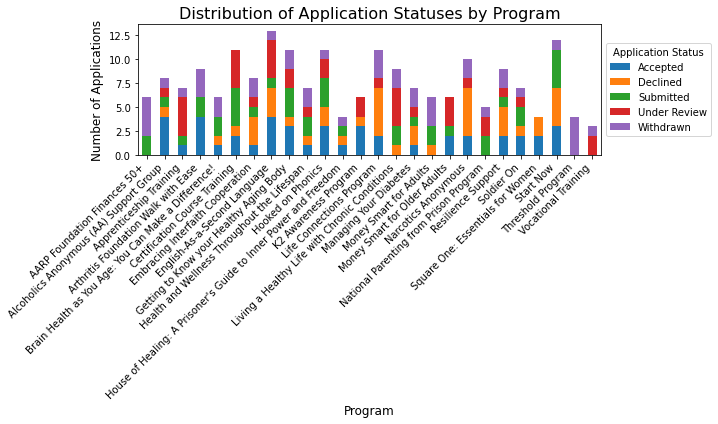

In [140]:
# Visualizing the results:
fig, ax = plt.subplots(figsize=(10, 6))
program_status_matrix.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Program', fontsize=12)
ax.set_ylabel('Number of Applications', fontsize=12)
ax.set_title('Distribution of Application Statuses by Program', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(title='Application Status', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

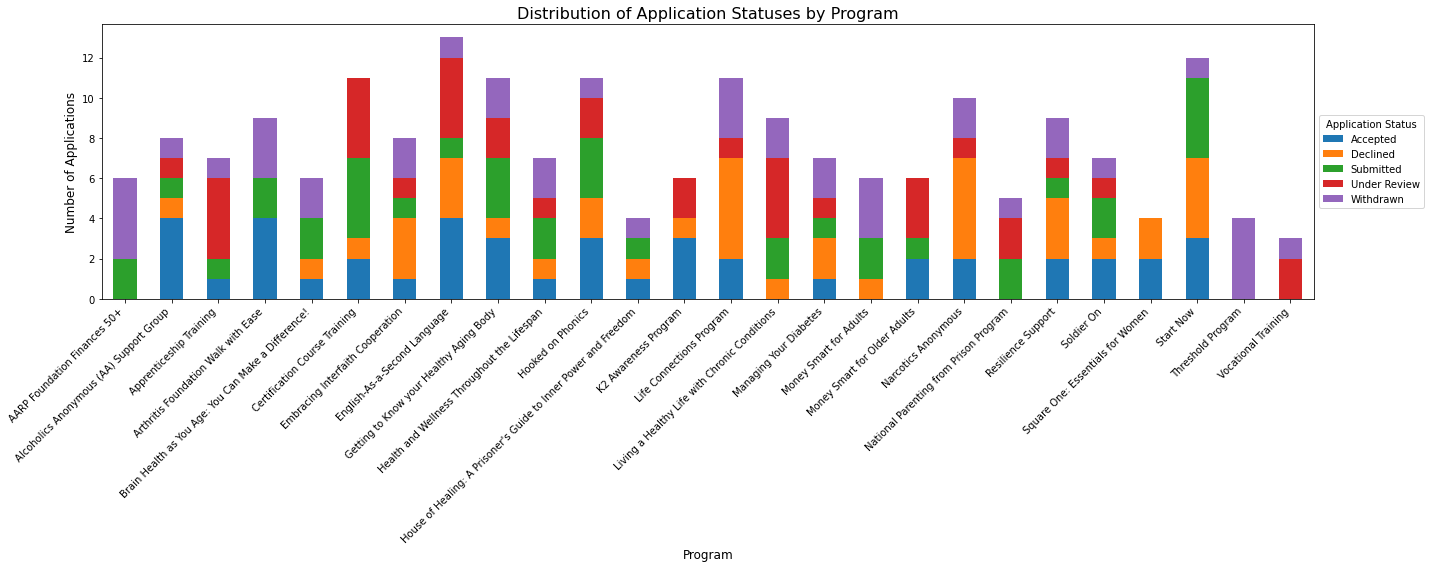

In [141]:
# Visualizing the results:
fig, ax = plt.subplots(figsize=(20, 8))
program_status_matrix.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Program', fontsize=12)
ax.set_ylabel('Number of Applications', fontsize=12)
ax.set_title('Distribution of Application Statuses by Program', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend(title='Application Status', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

### II. Demand among Volunteers

In [95]:
# Count the number of applications per program
program_count = df['Posting: Program'].value_counts().head(10)
program_count

English-As-a-Second Language                     13
Start Now                                        12
Getting to Know your Healthy Aging Body          11
Hooked on Phonics                                11
Certification Course Training                    11
Life Connections Program                         11
Narcotics Anonymous                              10
Living a Healthy Life with Chronic Conditions     9
Arthritis Foundation Walk with Ease               9
Resilience Support                                9
Name: Posting: Program, dtype: int64

In [96]:
# What are the top programs with the highest number of applications?
top_programs = program_count.head(10)  
top_programs

English-As-a-Second Language                     13
Start Now                                        12
Getting to Know your Healthy Aging Body          11
Hooked on Phonics                                11
Certification Course Training                    11
Life Connections Program                         11
Narcotics Anonymous                              10
Living a Healthy Life with Chronic Conditions     9
Arthritis Foundation Walk with Ease               9
Resilience Support                                9
Name: Posting: Program, dtype: int64

In [97]:
# Calculate the total number of applications
total_applications = program_count.sum()
total_applications

106

In [98]:
# Calculate the percentage of applications for each program
program_percentages = (top_programs / total_applications) * 100
program_percentages

English-As-a-Second Language                     12.264151
Start Now                                        11.320755
Getting to Know your Healthy Aging Body          10.377358
Hooked on Phonics                                10.377358
Certification Course Training                    10.377358
Life Connections Program                         10.377358
Narcotics Anonymous                               9.433962
Living a Healthy Life with Chronic Conditions     8.490566
Arthritis Foundation Walk with Ease               8.490566
Resilience Support                                8.490566
Name: Posting: Program, dtype: float64

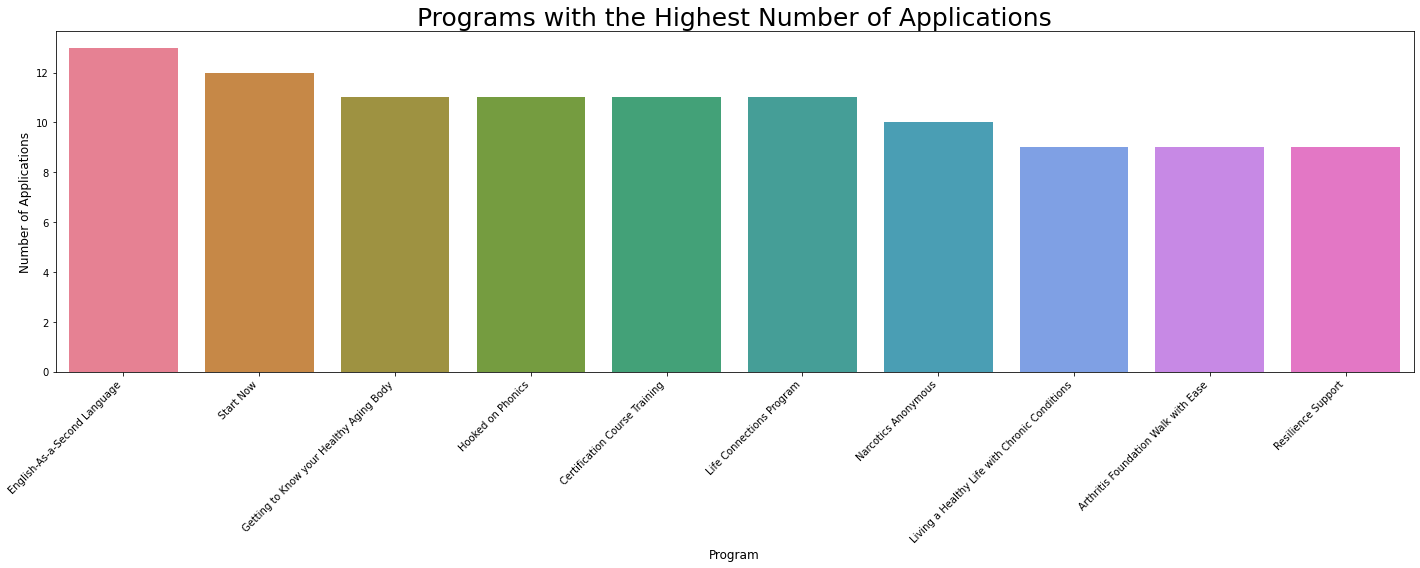

In [105]:
# Create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(20, 8))
bar_plot = sns.barplot(x=top_programs.index, y=top_programs.values, palette="husl", ax=ax)

# Add labels and title
ax.set_xlabel('Program', fontsize=12)
ax.set_ylabel('Number of Applications', fontsize=12)
ax.set_title('Programs with the Highest Number of Applications', fontsize=25)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Based on the data, there is a high demand and popularity by the volunteers for the following programs. These programs should be continued and improved further in the curriculum. Programs with a higher number of applications relative to the number of volunteers needed may indicate higher popularity or demand among volunteers
- English-As-a-Second Language                     
- Start Now                                        
- Getting to Know your Healthy Aging Body          
- Hooked on Phonics                               
- Certification Course Training                    
- Life Connections Program             

***How does the distribution of volunteer applications across different locations reflect varying levels of demand for volunteer opportunities in those areas?***


In [118]:
location_counts = df['Location'].value_counts().head(10)
location_counts

PA    10
OK     7
FL     7
SD     7
AK     7
MI     7
LA     7
WA     7
KS     7
NH     6
Name: Location, dtype: int64

In [119]:
total_applications = len(data)
total_applications

200

In [120]:
# Percentage of applications for each location
location_percentages = (location_counts / total_applications) * 100
location_percentages

PA    5.0
OK    3.5
FL    3.5
SD    3.5
AK    3.5
MI    3.5
LA    3.5
WA    3.5
KS    3.5
NH    3.0
Name: Location, dtype: float64

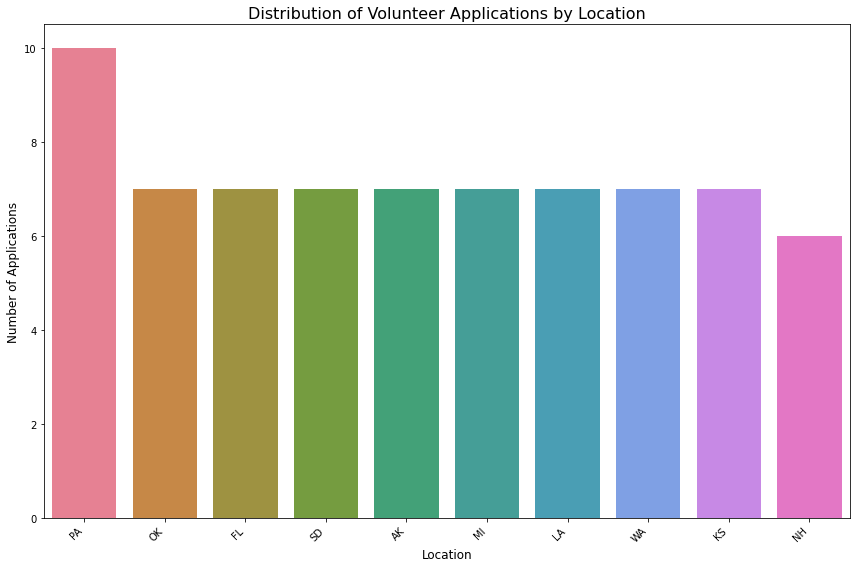

In [138]:
# Create a bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
bar_plot = sns.barplot(x=location_counts.index, y=location_counts.values, palette="husl", ax=ax)

# Add labels and title
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Number of Applications', fontsize=12)
ax.set_title('Distribution of Volunteer Applications by Location', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

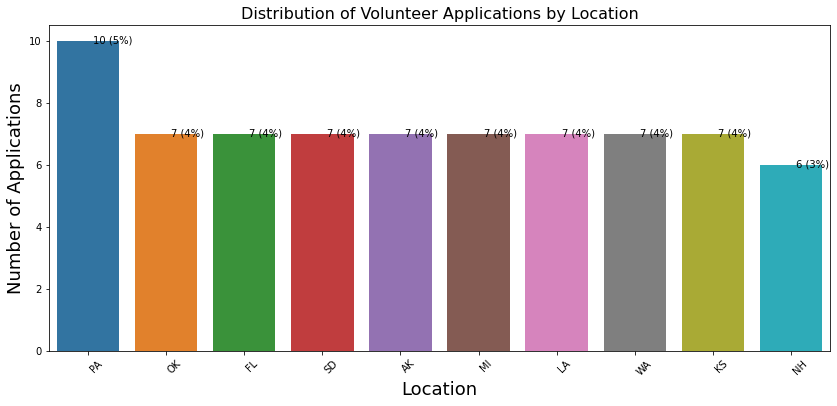

In [135]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='Location', data=df, order=location_counts.index, ax=ax)

# Add labels and title
ax.set_xlabel('Location', fontsize=18)
ax.set_ylabel('Number of Applications', fontsize=18)
ax.set_title('Distribution of Volunteer Applications by Location', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='left')

# Add location percentages to each bar
for i, location in enumerate(location_counts.index):
    count = location_counts[location]
    location_percentage = location_percentages[location]
    ax.annotate(f'{count} ({location_percentage:.0f}%)',
                xy=(i, count),
                xytext=(5, 0),
                textcoords="offset points",
                va='center', ha='left')

# Show the plot

plt.show()

### III. Impact of the program status on volunteer applications

How does the status of a program (Active vs. Closed) affect the number of applications and their acceptance rate?


In [25]:
# Categorize programs as Active or Closed
df['Program Status'] = df['Posting: Status'].apply(lambda x: 'Active' if x == 'Active' else 'Closed')

In [26]:
# Number of applications for Active and Closed programs
count = df['Program Status'].value_counts()
count

Closed    101
Active     99
Name: Program Status, dtype: int64

In [28]:
# Number of accepted applications for Active and Closed programs
accepted_counts = df[df['Status'] == 'Accepted']['Program Status'].value_counts()
accepted_counts

Active    23
Closed    21
Name: Program Status, dtype: int64

In [31]:
acceptance_rate = (accepted_counts / count) * 100
acceptance_rate

Active    23.232323
Closed    20.792079
Name: Program Status, dtype: float64

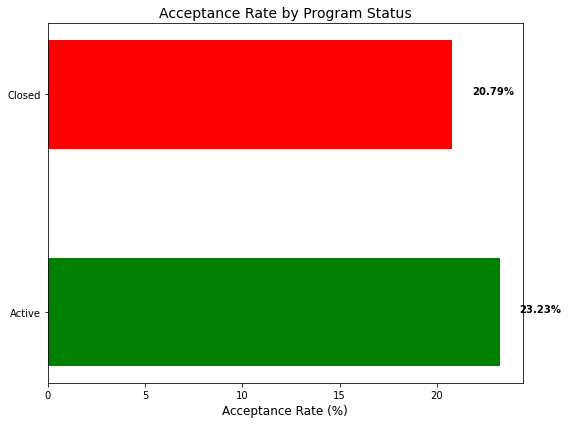

In [39]:
# Create a line chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5
index = range(len(acceptance_rate))
ax.barh(index, acceptance_rate.values, bar_width, color=['green', 'red'])

# Add labels and title
ax.set_yticks(index)
ax.set_yticklabels(acceptance_rate.index)
ax.set_xlabel('Acceptance Rate (%)', fontsize=12)
ax.set_title('Acceptance Rate by Program Status', fontsize=14)

# Add value labels to the bars
for i, v in enumerate(acceptance_rate.values):
    ax.text(v + 1, i, f'{v:.2f}%', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

### IV. Geographic Location

How do the preferences for volunteer programs vary across different states, and what factors contribute to the popularity of specific programs in particular geographical regions?

In [85]:
# Creating a new column called 'State'
df['State'] = df['Location'].apply(lambda x: x if len(x) == 2 else '')

In [89]:
program_state_counts = df.groupby(['Posting: Program', 'State'])['APPID'].count().reset_index()
program_state_counts.columns = ['Program', 'State', 'Application Count']

In [90]:
# Top 5 programs and the Top 5 states
top_programs = program_state_counts['Program'].value_counts().head(5).index
top_states = program_state_counts['State'].value_counts().head(5).index

In [92]:
program_state_counts = program_state_counts[(program_state_counts['Program'].isin(top_programs)) & (program_state_counts['State'].isin(top_states))]
program_state_counts

,Program,State,Application Count
35,Certification Course Training,AK,1
41,Certification Course Training,MI,1
52,English-As-a-Second Language,AK,1
57,English-As-a-Second Language,OK,1
67,Getting to Know your Healthy Aging Body,FL,1
73,Getting to Know your Healthy Aging Body,OK,1
82,Hooked on Phonics,FL,1
85,Hooked on Phonics,MI,1
87,Hooked on Phonics,PA,2
168,Start Now,FL,1


In [93]:
# Generating a matrix of program counts by state
program_state_matrix = program_state_counts.pivot(index='Program', columns='State', values='Application Count')
program_state_matrix = program_state_matrix.fillna(0)

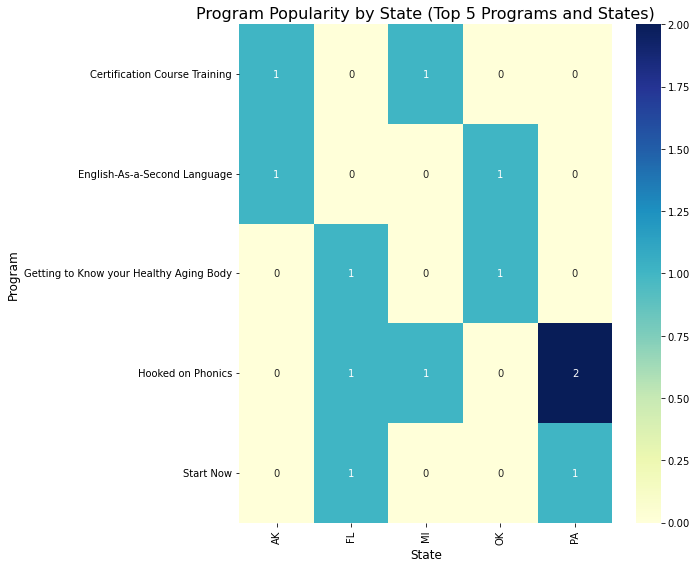

In [94]:
# Heatmap to visualize the program popularity by state
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(program_state_matrix, annot=True, cmap="YlGnBu", ax=ax)
ax.set_title('Program Popularity by State (Top 5 Programs and States)', fontsize=16)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Program', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### V. Optimization of Program Selection 

How can we optimize program selection and design to increase acceptance rates and engagement among incarcerated individuals, considering factors such as program type, status (Active vs. Closed), and departmental focus?

In [41]:
# Count the number of accepted applications for Active and Closed programs
accepted = df[df['Status'] == 'Accepted']['Posting: Status'].value_counts()
accepted

Active    23
Closed    21
Name: Posting: Status, dtype: int64

In [42]:
acceptance_rate = (accepted_counts / count) * 100
acceptance_rate

Active    23.232323
Closed    20.792079
Name: Program Status, dtype: float64

In [69]:
# Number of applications for each program:
department_count = df['Posting: Department'].value_counts().head(5)
department_count

Recreation              24
Administration          22
Unit Management (UM)    21
Religious Services      20
Camp                    19
Name: Posting: Department, dtype: int64

In [74]:
# Accepted Prgram counts:
accepted_department_counts = df[df['Status'] == 'Accepted']['Posting: Department'].value_counts()
accepted_department_counts

Recreation                   9
Religious Services           5
Psychology                   5
Health Services              4
Education                    4
Food Services                4
Financial Management         3
Unit Management (UM)         3
FDC/Jail - Administration    3
Administration               2
Camp                         2
Name: Posting: Department, dtype: int64

In [76]:
# Acceptance rate for each program:
department_acceptance_rates = (accepted_department_counts / department_count) * 100
department_acceptance_rates

Administration                9.090909
Camp                         10.526316
Education                          NaN
FDC/Jail - Administration          NaN
Financial Management               NaN
Food Services                      NaN
Health Services                    NaN
Psychology                         NaN
Recreation                   37.500000
Religious Services           25.000000
Unit Management (UM)         14.285714
Name: Posting: Department, dtype: float64

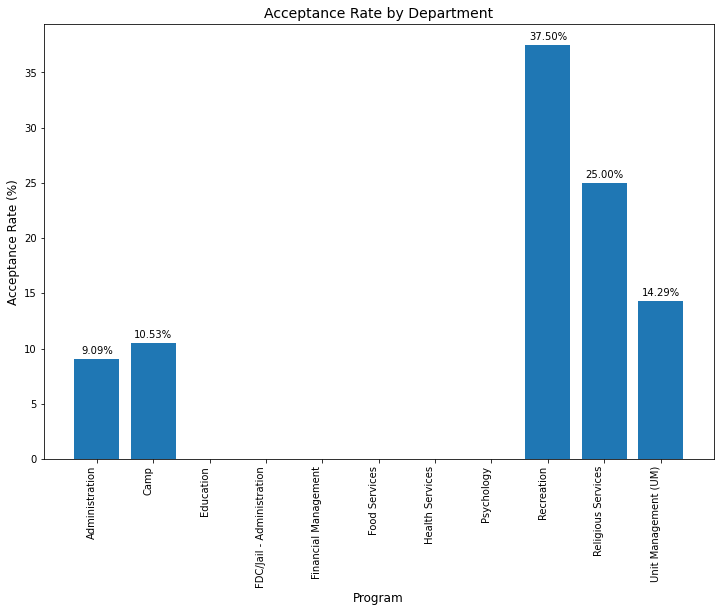

In [77]:
# Visualizing the Acceptance rate by program
fig, ax = plt.subplots(figsize=(12, 8))
bar_plot = ax.bar(department_acceptance_rates.index, department_acceptance_rates.values)
ax.set_xlabel('Program', fontsize=12)
ax.set_ylabel('Acceptance Rate (%)', fontsize=12)
ax.set_title('Acceptance Rate by Department', fontsize=14)
plt.xticks(rotation=90, ha='right')

# Add value labels on top of bars
for bar in bar_plot:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()